In [1]:
from matplotlib.patches import Patch

from google.colab import files
uploaded = files.upload()

Saving gender-specific-med.xlsx to gender-specific-med.xlsx
Saving neutral-med.xlsx to neutral-med.xlsx


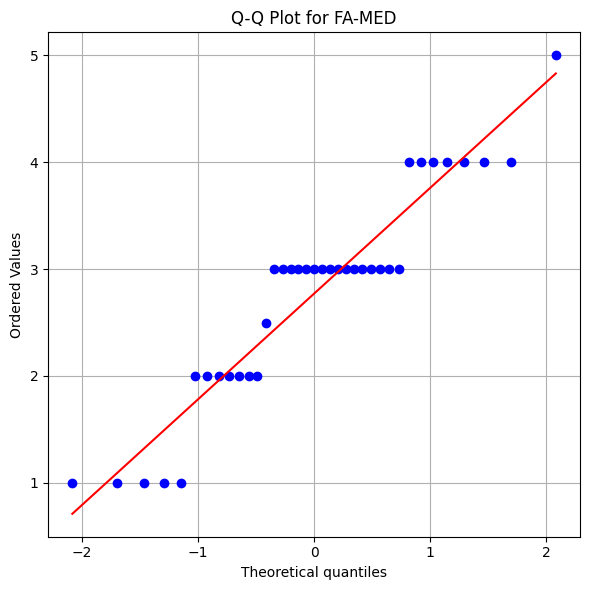

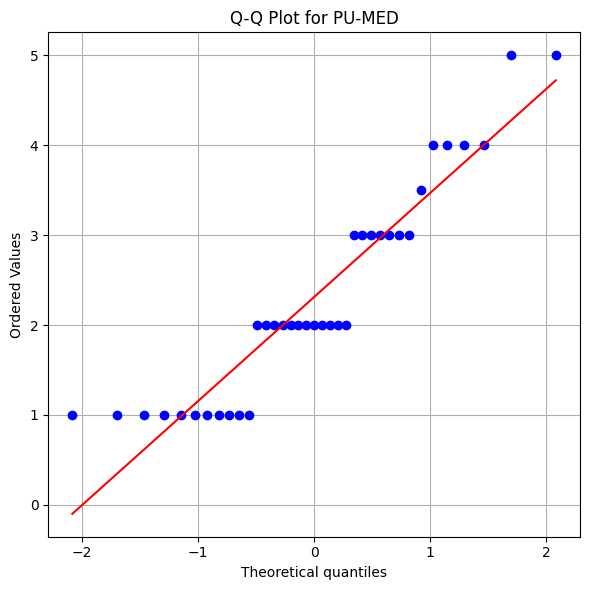

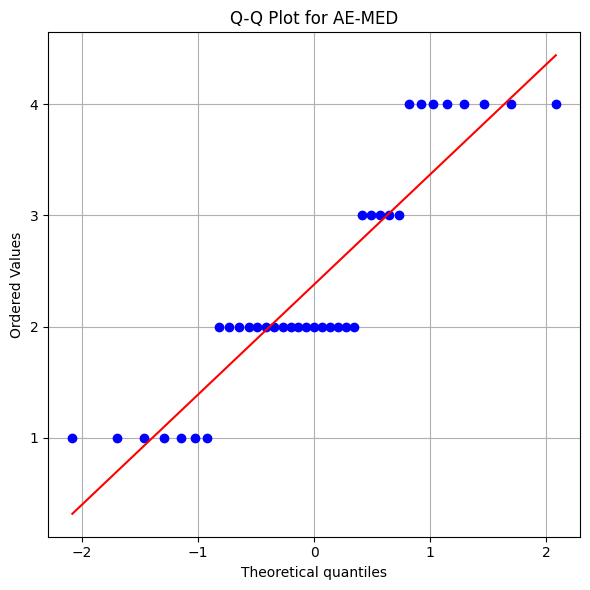

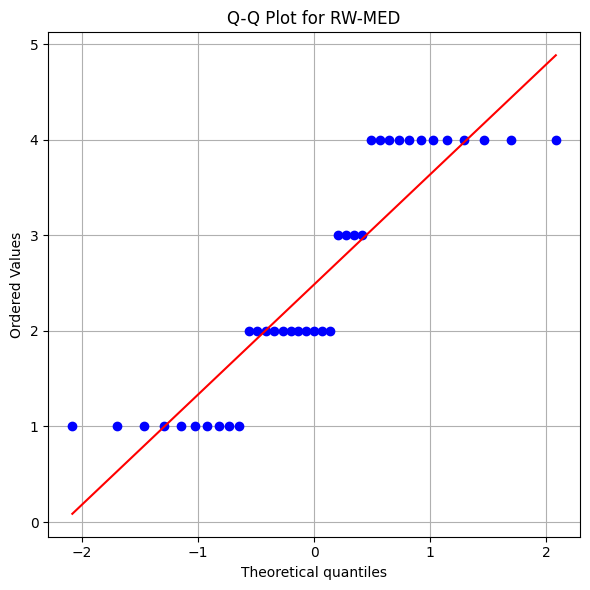

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_excel("neutral-med.xlsx")

columns = ['FA-MED', 'PU-MED', 'AE-MED', 'RW-MED']

for col in columns:
    data = df[col].dropna()
    plt.figure(figsize=(6, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


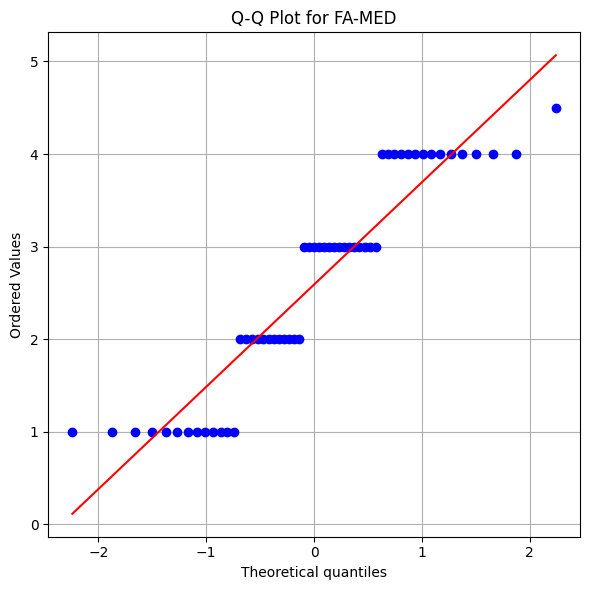

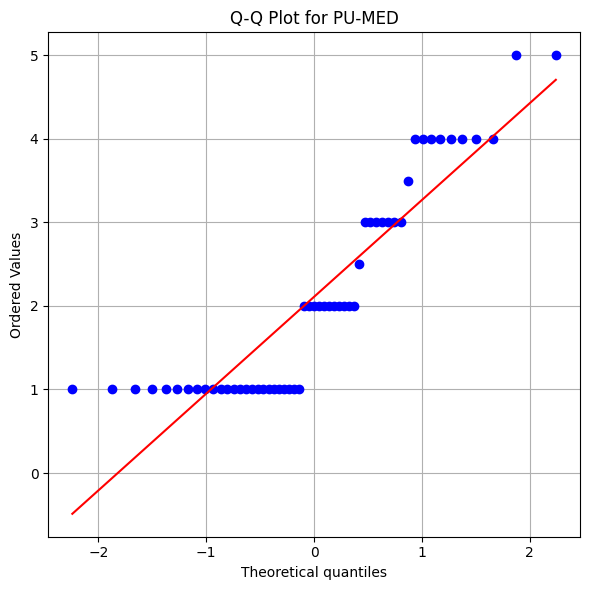

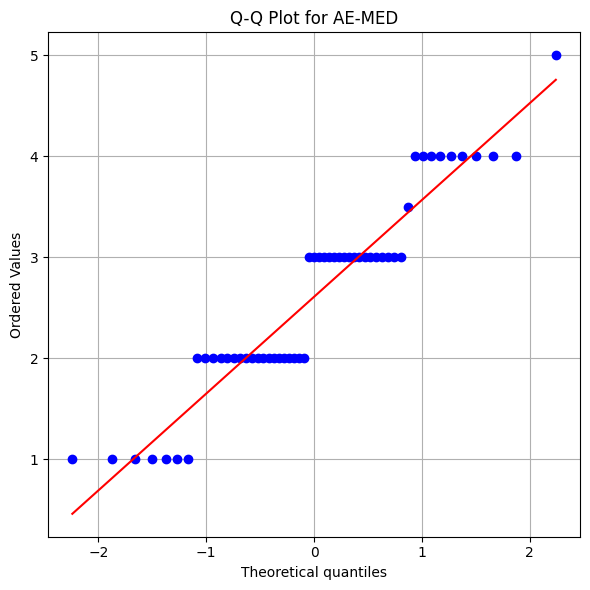

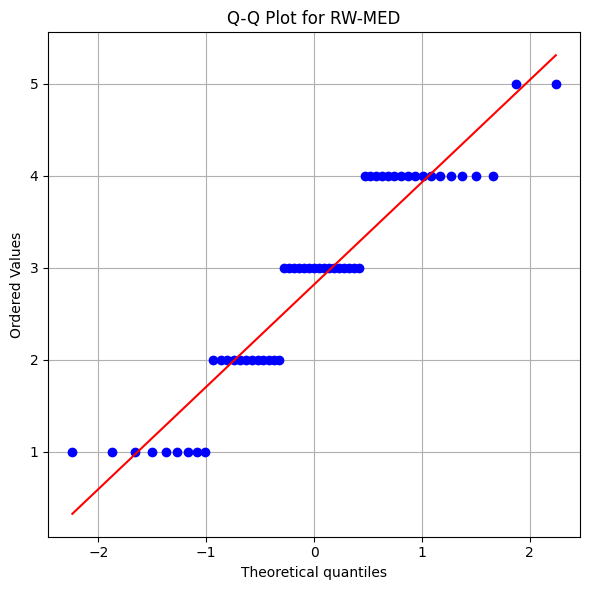

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_excel("gender-specific-med.xlsx")

columns = ['FA-MED', 'PU-MED', 'AE-MED', 'RW-MED']

for col in columns:
    data = df[col].dropna()
    plt.figure(figsize=(6, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [9]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load Excel files
gs_df = pd.read_excel("gender-specific-med.xlsx")
n_df = pd.read_excel("neutral-med.xlsx")

# Define dimension columns
# MED = median
dimensions = ['FA-MED', 'PU-MED', 'AE-MED', 'RW-MED']

# Perform Mann-Whitney U test
print("Mann-Whitney U test Results (gender-specific vs. neutral):\n")
for dim in dimensions:
    gs_values = gs_df[dim].dropna()
    n_values = n_df[dim].dropna()

    stat, p = mannwhitneyu(gs_values, n_values, alternative='two-sided')
    print(f"{dim}: U={stat:.2f}, p={p:.4f}\n")


Mann-Whitney U test Results (gender-specific vs. neutral):

FA-MED: U=940.50, p=0.5284

PU-MED: U=899.50, p=0.3290

AE-MED: U=1159.00, p=0.2404

RW-MED: U=1169.00, p=0.2142



/tmp/ipython-input-8-190059635.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ct.index, fontsize=14)
/tmp/ipython-input-8-190059635.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ct.index, fontsize=14)
/tmp/ipython-input-8-190059635.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ct.index, fontsize=14)
/tmp/ipython-input-8-190059635.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ct.index, fontsize=14)


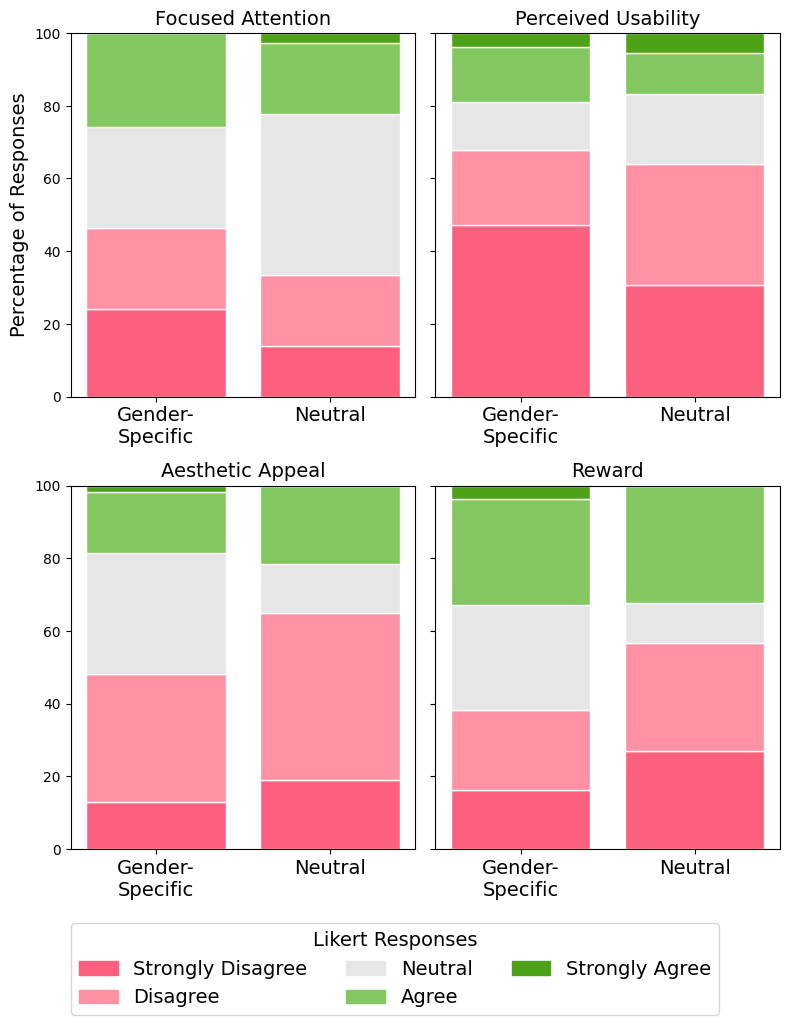

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load data
gs_df = pd.read_excel("gender-specific-med.xlsx")
n_df = pd.read_excel("neutral-med.xlsx")

# Add group labels
gs_df["Group"] = "Gender-\nSpecific"
n_df["Group"] = "Neutral"

# Combine datasets
combined_df = pd.concat([gs_df, n_df], ignore_index=True)

# Dimensions and Likert labels
dimensions = ['FA-MED', 'PU-MED', 'AE-MED', 'RW-MED']
dimension_labels = [
    'Focused Attention',
    'Perceived Usability',
    'Aesthetic Appeal',
    'Reward'
]

likert_map = {
    1: 'Strongly Disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly Agree'
}
likert_order = list(likert_map.values())

colors = {
    'Strongly Disagree': '#fb607f',
    'Disagree': '#ff91a4',
    'Neutral': '#e6e6e6',
    'Agree': '#83c760',
    'Strongly Agree': '#4ea217'
}

# Create subplots for each dimension
fig, axes = plt.subplots(2, 2, figsize=(8, 10), sharey=True)
axes = axes.flatten()

for i, dim in enumerate(dimensions):
    ax = axes[i]

    # Map numeric Likert responses to labels
    combined_df[f'{dim}_label'] = combined_df[dim].map(likert_map)

    # Crosstab for normalized percentage counts
    ct = pd.crosstab(
        combined_df['Group'],
        combined_df[f'{dim}_label'],
        normalize='index'
    ) * 100

    # Ensure all Likert levels are present
    ct = ct.reindex(columns=likert_order, fill_value=0)

    # Plot stacked bars
    bottom = [0] * len(ct)
    for response in likert_order:
        values = ct[response].values
        ax.bar(
            ct.index,
            values,
            bottom=bottom,
            label=response if i == 0 else "",
            color=colors[response],
            edgecolor='white'
        )
        bottom = [a + b for a, b in zip(bottom, values)]

    ax.set_title(dimension_labels[i], fontsize=14)
    ax.set_ylim(0, 100)
    ax.set_xticklabels(ct.index, fontsize=14)
    if i == 0:
        ax.set_ylabel("Percentage of Responses", fontsize=14)

likert_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
response_patches = [Patch(color=colors[label], label=label) for label in likert_order]

# Add legend below all plots
fig.legend(
    handles=response_patches,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.03),
    ncol=3,
    frameon=True,
    fontsize=14,
    title="Likert Responses",
    title_fontsize=14
)

plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.show()
